In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Healthcare Insurance
This dataset contains information on the relationship between personal attributes (age, gender, BMI, family size, smoking habits), geographic factors, and their impact on medical insurance charges. It can be used to study how these features influence insurance costs and develop predictive models for estimating healthcare expenses.

## Gathering data

In [25]:
# assigns the string "insurance.csv" to the variable file_name.
file_name = "insurance.csv"

In [26]:
# read the CSV file specified by file_name into a pandas DataFrame df
df = pd.read_csv(file_name)

## Assess & Analyze

In [27]:
# Display the first 5 rows of the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
# Summary of a DataFrame's structure and information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [29]:
# Get descriptive statistics and transpose the result
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Clean df
Review duplicates and remove them.

In [30]:
# Find and display duplicate rows
df[df.duplicated()==True]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [31]:
# remove duplicate rows from DataFrame
df.drop_duplicates(inplace=True)

In [32]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Assignement three questions

## Model & Visualize

#### Does a persons location equate to an increase in cost? 
Analyze whether a person's location significantly influences medical insurance charges.
Identify regions with higher average costs to inform strategic pricing or targeted interventions.

In [33]:
# Group by region and calculate the mean charges
region_costs = df.groupby("region")["charges"].mean()

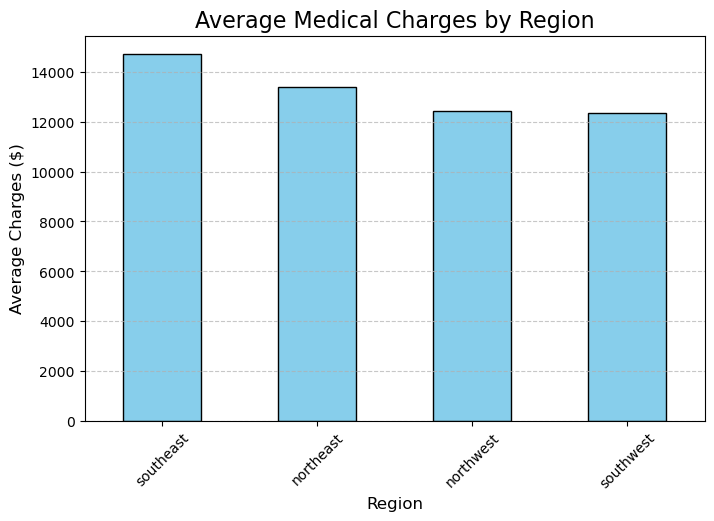

In [34]:
# Plot the bar graph
plt.figure(figsize=(8, 5))
region_costs.sort_values(ascending=False).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Medical Charges by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Average Charges ($)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#### Do smokers have more medical expenses?
Assessing the Effect of Smoking Habits. Evaluate whether smokers have higher medical insurance expenses compared to non-smokers. I also want to Quantify the financial impact of smoking on healthcare costs for risk assessment.

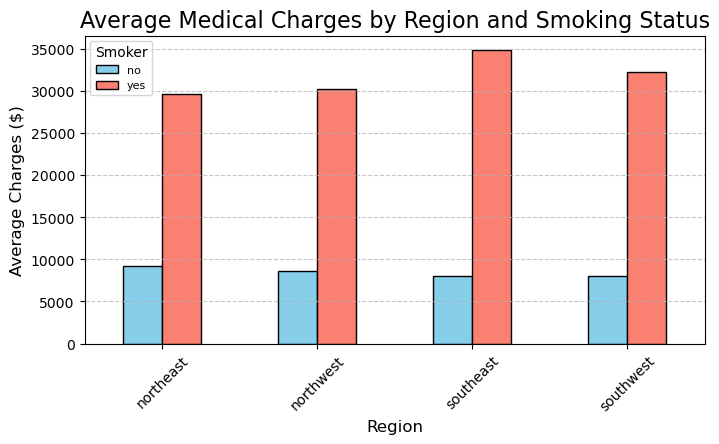

In [35]:
# compare regions across additional categories, group by "region", "smoker." Then calculate the mean charges
region_smoker_costs = df.groupby(["region", "smoker"])["charges"].mean().unstack()

#plot
region_smoker_costs.plot(kind="bar", figsize=(8, 4), color=["skyblue", "salmon"], edgecolor="black")
plt.title("Average Medical Charges by Region and Smoking Status", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Average Charges ($)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Smoker", fontsize=8)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [36]:
# Group by smoker status and calculate the mean charges
smoker_costs = df.groupby("smoker")["charges"].mean()

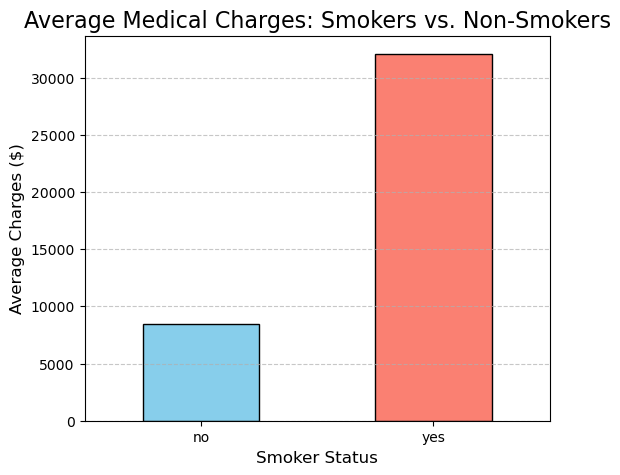

In [37]:
# Plot the bar graph
plt.figure(figsize=(6, 5))
smoker_costs.plot(kind="bar", color=["skyblue", "salmon"], edgecolor="black")
plt.title("Average Medical Charges: Smokers vs. Non-Smokers", fontsize=16)
plt.xlabel("Smoker Status", fontsize=12)
plt.ylabel("Average Charges ($)", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#### Does higher BMI in adults result in higher cost?
Examine BMI's Role in Healthcare Costs:
Investigate if higher Body Mass Index (BMI) in adults correlates with increased medical expenses.
Establish thresholds for BMI-related risk factors that affect insurance pricing.

In [38]:
# Define BMI categories
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal weight"
    elif 25 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obese"

# Add a BMI category column
df["bmi_category"] = df["bmi"].apply(bmi_category)

# Group by BMI category and calculate the mean charges
bmi_costs = df.groupby("bmi_category")["charges"].mean()

In [39]:
# View header and first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


In [40]:
# Sort BMI categories in a logical order
bmi_costs = bmi_costs.reindex(["Underweight", "Normal weight", "Overweight", "Obese"])

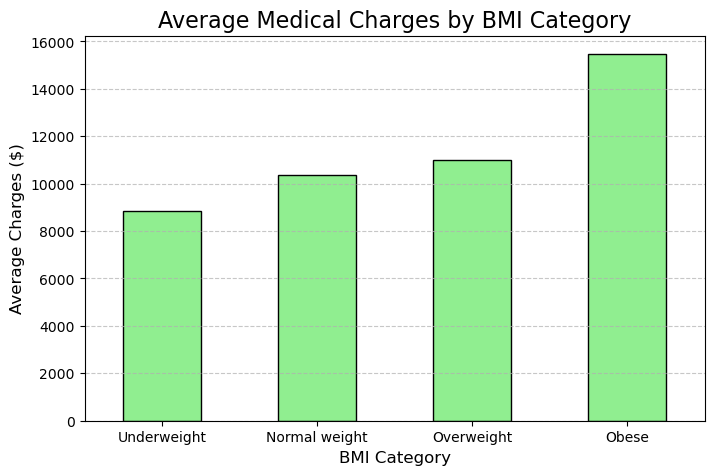

In [41]:
# Plot the bar graph
plt.figure(figsize=(8, 5))
bmi_costs.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Average Medical Charges by BMI Category", fontsize=16)
plt.xlabel("BMI Category", fontsize=12)
plt.ylabel("Average Charges ($)", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)